In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from os import system

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [4]:
original_df = pd.read_csv("MinNumLosses.csv")
df = pd.read_csv("MinNumLosses.csv")
# print(len(df))
runtime15=df[df['min_num_losses'] == -1].index
df.drop(runtime15, inplace=True)
# test_df = df(np.random.randn(100,2))
train_df, test_df = train_test_split(df, test_size = 0.2)
test_y = test_df['min_num_losses'].values
train_df, validation_df = train_test_split(train_df, test_size=0.2)
# train_df.reset_index(drop=True)
print(len(df))

19352


In [5]:
train_df.describe(include='all')

,c_avg_deg_cons,c_avg_dom_cons,c_avg_domdeg_cons,c_bounds_d,c_bounds_r,c_bounds_z,c_cv_deg_cons,c_cv_dom_cons,c_cv_domdeg_cons,c_domain,...,v_ratio_bounded,v_ratio_vars,v_sum_deg_vars,v_sum_dom_vars,v_sum_domdeg_vars,number_of_teams,fixtures_left,number_of_constraints,runtime,min_num_losses
count,12384.000000,12384.000000,12384.000000,12384.0,12384.0,12384.0,12384.000000,12384.000000,12384.000000,12384.0,...,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000
mean,2.729710,4.855934,1.715085,0.0,0.0,0.0,0.657278,0.736570,0.462833,0.0,...,0.349761,0.978894,1897.588098,1885.677568,818.670969,10.778343,4.294008,2.855943,0.874911,3.265100
std,0.083999,0.592308,0.156760,0.0,0.0,0.0,0.151946,0.103582,0.077070,0.0,...,0.171664,0.007917,1285.993763,1306.881935,558.407639,3.721732,2.911610,1.416524,3.047644,2.351195
min,2.432620,3.653340,1.408750,0.0,0.0,0.0,0.412949,0.511876,0.278296,0.0,...,0.112381,0.950704,341.000000,339.000000,155.000000,6.000000,1.000000,1.000000,0.020000,0.000000
25%,2.676330,4.456390,1.594310,0.0,0.0,0.0,0.523940,0.651454,0.405777,0.0,...,0.184466,0.973494,798.000000,799.750000,340.807000,7.000000,2.000000,2.000000,0.040000,1.000000
50%,2.741090,4.895240,1.716430,0.0,0.0,0.0,0.633010,0.734777,0.456914,0.0,...,0.316180,0.980211,1399.000000,1409.000000,596.359000,10.000000,4.000000,3.000000,0.070000,3.000000
75%,2.797650,5.301315,1.828833,0.0,0.0,0.0,0.797969,0.814730,0.514620,0.0,...,0.512273,0.985599,2914.750000,2841.250000,1268.320000,14.000000,6.000000,4.000000,0.140000,5.000000
max,2.878490,5.963050,2.037180,0.0,0.0,0.0,1.013470,1.028680,0.656311,0.0,...,0.706587,0.991839,6156.000000,6624.000000,2712.780000,18.000000,16.000000,5.000000,15.020000,9.000000


In [6]:
def getAverages(lst, average_feature, average_result):
    copy_lst = lst.reset_index(drop=True)
    averages = []
    if copy_lst[average_feature].max()%1 == 0:
        for value in range(1, copy_lst[average_feature].max()+1):
            value_indices = np.where(copy_lst[average_feature]==value)
            total=0
            for value_index in value_indices[0]:
                total += int(copy_lst[average_result][value_index])
            if len(value_indices[0]) != 0:
                averages.append([value, total/len(value_indices[0])])
    else:
        for value in range(1, (int(copy_lst[average_feature].max()//1)+3)):
            value_indices_less = np.where((copy_lst[average_feature]<=value))
            value_indices_greater = np.where((copy_lst[average_feature]>value-1))
            value_indices = [np.intersect1d(value_indices_less, value_indices_greater)]
            print(np.average(value_indices[0]))
            total=0
            for value_index in value_indices[0]:
                total += copy_lst[average_result][value_index]
            if len(value_indices[0]) != 0:
                averages.append([value, total/len(value_indices[0])])
    return averages

In [7]:
train_y = train_df['min_num_losses'].values
league_numeric_features = ['c_avg_deg_cons',
 'c_avg_dom_cons',
 'c_avg_domdeg_cons',
 'c_cv_deg_cons',
 'c_cv_dom_cons',
 'c_cv_domdeg_cons',
 'c_ent_deg_cons',
 'c_ent_dom_cons',
 'c_ent_domdeg_cons',
 'c_logprod_deg_cons',
 'c_logprod_dom_cons',
 'c_max_deg_cons',
 'c_max_dom_cons',
 'c_max_domdeg_cons',
 'c_num_cons',
 'c_ratio_cons',
 'c_sum_ari_cons',
 'c_sum_dom_cons',
 'c_sum_domdeg_cons',
 'd_bool_vars',
 'd_int_cons',
 'd_int_vars',
 'd_ratio_bool_vars',
 'd_ratio_int_cons',
 'd_ratio_int_vars',
 'o_deg',
 'o_deg_avg',
 'o_deg_cons',
 'o_deg_std',
 'o_dom',
 'o_dom_avg',
 'o_dom_std',
 'v_avg_deg_vars',
 'v_avg_dom_vars',
 'v_avg_domdeg_vars',
 'v_cv_deg_vars',
 'v_cv_dom_vars',
 'v_cv_domdeg_vars',
 'v_def_vars',
 'v_ent_deg_vars',
 'v_ent_dom_vars',
 'v_ent_domdeg_vars',
 'v_intro_vars',
 'v_logprod_deg_vars',
 'v_logprod_dom_vars',
 'v_max_deg_vars',
 'v_max_dom_vars',
 'v_max_domdeg_vars',
 'v_min_dom_vars',
 'v_min_domdeg_vars',
 'v_num_aliases',
 'v_num_consts',
 'v_num_vars',
 'v_ratio_bounded',
 'v_ratio_vars',
 'v_sum_deg_vars',
 'v_sum_dom_vars',
 'v_sum_domdeg_vars\n\n',
 'number_of_teams',
 'fixtures_left',
 'number_of_constraints']

null_league_numeric_values = [
    'v_min_deg_vars',
    'c_bounds_d',
    'c_bounds_r',
    'c_bounds_z',
    'd_ratio_set_cons',
    'd_ratio_set_vars',
    'd_set_cons',
    'd_set_vars',
    'gc_diff_globs',
    'gc_global_cons',
    'gc_ratio_diff',
    'gc_ratio_globs',
    's_bool_search',
    's_first_fail',
    's_goal',
    's_indomain_max',
    's_indomain_min',
    's_input_order',
    's_int_search',
    's_labeled_vars',
    's_other_val',
    's_other_var',
    's_set_search',
    'o_dom_deg',
    'd_ratio_float_cons',
    'd_ratio_float_vars',
    'c_min_deg_cons',
    'c_min_dom_cons',
    'c_min_domdeg_cons',
    'd_ratio_array_cons',
    'd_ratio_bool_cons',
    'd_float_cons',
    'd_float_vars',
    'd_array_cons',
    'd_bool_cons',
    'c_domain',
    'c_priority',
]

diagram_features = [
 'number_of_teams',
 'fixtures_left',
 'number_of_constraints'
]

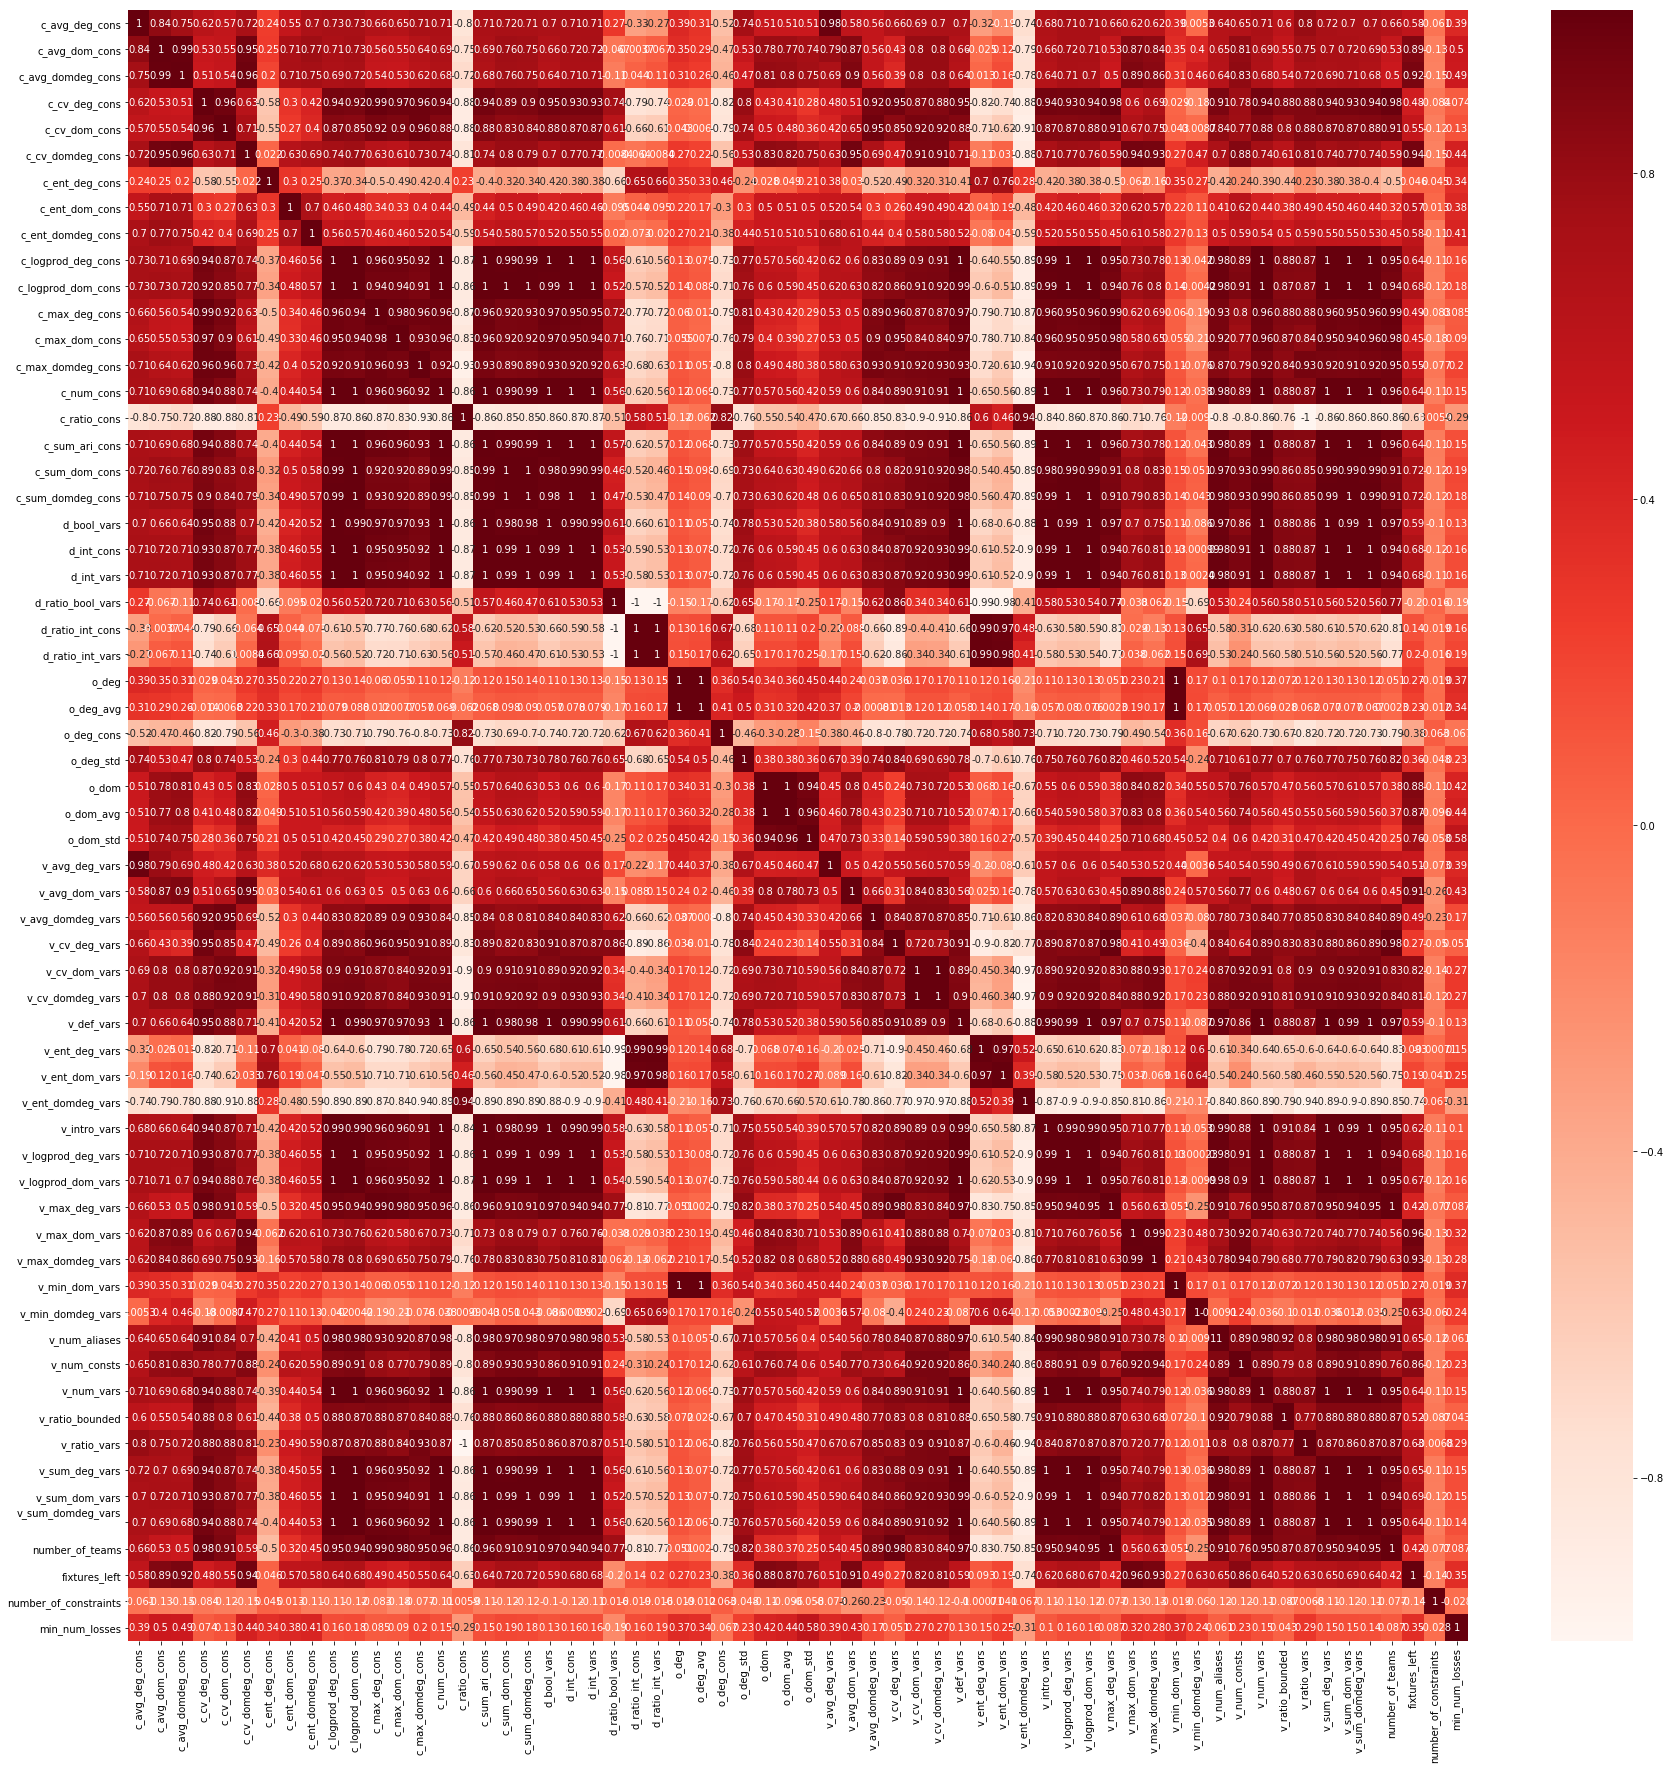

In [8]:
# split the features into sets of 5, check their correlation with output, and delete
# uncorrelated features
split_features = []
# league_numeric_features += ['result']
features_with_y = diagram_features
# train_df['result'] = train_y

for i in range(0, len(features_with_y), 10):
    split_features.append(features_with_y[i:i+10]+['runtime'])

# print(split_features)
# list(df.columns)
plt.figure(figsize=(30,30))
# cor = train_df[split_features[1]].corr()
cor = train_df[league_numeric_features+['min_num_losses']].corr()
# print(train_df[split_features[1]].corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
lr = Pipeline([
    ('pre', ColumnTransformer([('num', FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ('est', LinearRegression())
])

In [10]:
# train_df.isnull().sum()
print([i for i in train_df.columns if train_df[i].isnull().any()])
# train_df.isna().any()

['gc_ratio_diff']


In [11]:
league_dt = Pipeline([
    ('pre', ColumnTransformer([("num", FunctionTransformer(lambda x : x), league_numeric_features)], remainder="drop")),
    ("estimator", DecisionTreeRegressor(max_depth=40))
])

model = league_dt.fit(train_df, train_y)

In [12]:
np.mean(cross_val_score(league_dt, test_df, test_y, scoring='neg_mean_squared_error', cv=10))

-0.4703158714936467

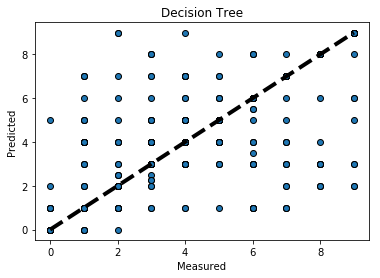

In [18]:
predicted = cross_val_predict(league_dt, test_df, test_y, cv=10)

fix, ax = plt.subplots()
ax.scatter(test_y, predicted, edgecolors=(0,0,0))
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=4)
plt.title("Decision Tree")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
predicted = cross_val_predict(league_dt, test_df, test_y, cv=10)

np.corrcoef(predicted, test_y)

array([[1.        , 0.95788698],
       [0.95788698, 1.        ]])

In [15]:
# 1 or 2 pages about the product
# numbers for the satisfiability problem
# Start writing
# finalise figures


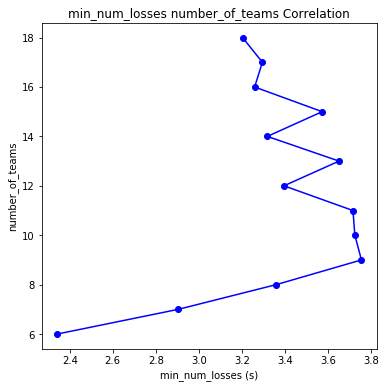

In [16]:
results = getAverages(train_df, 'number_of_teams', 'min_num_losses')
runtime = []
number_of_teams = []
for item in results:
    runtime.append(item[1])
    number_of_teams.append(item[0])

fig = plt.figure(figsize=(6,6))
plt.title('min_num_losses number_of_teams Correlation')
plt.plot(runtime, number_of_teams, color='blue', marker='o')
plt.xlabel('min_num_losses (s)')
plt.ylabel('number_of_teams')
plt.show()